<a href="https://colab.research.google.com/github/AnaP-997/product-review-project/blob/main/product_review_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🕵️‍♂️ Loading and inspecting the dataset

Before diving into analysis we first need to load the dataset and take a look at its structure. In this step we will:



*   Load the CSV file from Github
*   Check how many rows and columns we have
*   Display the first few rows
*   Review data types and basic metadata for each column

This will help us ensure that the dataset is correctly loaded and ready for further exploration.






In [ ]:
import pandas as pd


url = "https://raw.githubusercontent.com/AnaP-997/product-review-project/main/data/IMLP4_13-product_reviews_full.csv"

In [ ]:
df=pd.read_csv(url)

print("Number of rows:",len(df))
print("\nFirst five rows",df.head())

Number of rows: 171380

First five rows                             review_uuid  \
0  31b07b9a-4567-4db1-81f6-1bcef33b3e7b   
1  1cb2b4b5-9805-4c2d-9393-6b1382cb7c53   
2  f64165f0-29a2-4cfb-8b15-13c0c893e54d   
3  e442e083-a343-4052-b015-41e531e52d3e   
4  f4abefb8-22f0-4672-af73-2aa2954b24e0   

                                        product_name product_price  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...         48.18   

      review_title                                        review_text  \
0           Super!  great cooler excellent air flow and for this p...   
1          Awesome              best budget 2 fit cooler nice cooling   
2             Fair  the quality is good but the power of air 

## 🔍 Checking for missing values

Missing data can cause problems during model training and analysis.
Here, we will:



*   Count the number of missing values per clumn (NaN)
*   Visualize missing values using heatmap

This will help us identify any columns that require cleaning or imputation.



In [ ]:
print("Missing values:\n")
print(df.isna().sum())

Missing values:

review_uuid         0
product_name        0
product_price     426
review_title        1
review_text         1
sentiment        5011
dtype: int64


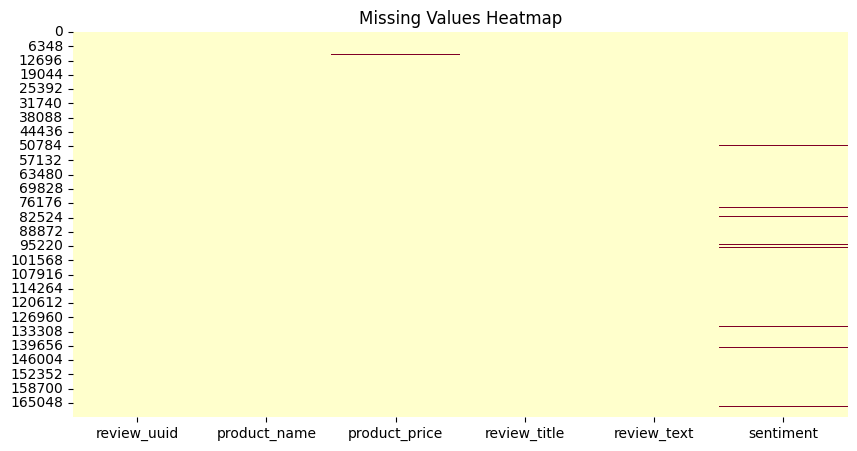

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
sentiment_counts=df['sentiment'].value_counts()
print("Distribution of values inside 'sentiment' column:\n")
print(sentiment_counts)

Distribution of values inside 'sentiment' column:

sentiment
positive    85537
negative    32369
Positive    22361
Negative    12392
neutral     10508
Neutral      3202
Name: count, dtype: int64


## 📊 Sentiment analysis

Let's see how many reviews are labeled as positive vs negative vs neutral.

This helps us:

*   Understand the balance between classes
*   Detect if the dataset is skewed



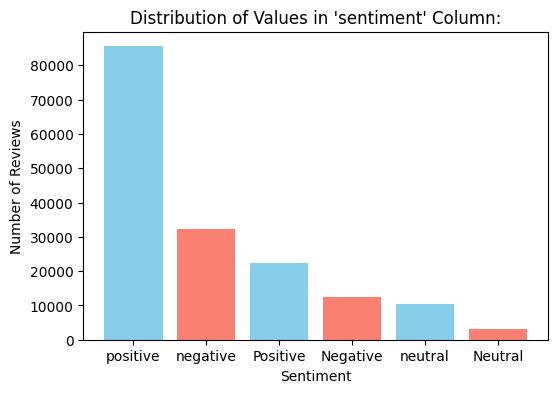

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index,sentiment_counts.values,color=['skyblue','salmon'])
plt.title("Distribution of Values in 'sentiment' Column:")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

## 💸 Exploring the 'product_price' column

Before we can use price data in any meaningful way, we first need to understand how it is stored and formatted.
 In this section we wil:


*   Check the data type of the product_price column
*   Preview a few sample values
*   Identify the most common price entries.
*   Detect non-numeric or probelmatic values such as: "Free", "NaN" or corrupted symbols.

This is the important part of of data cleaning. Even if value looks like a number, it may still be stored as a string and cause problems during numeric analysis or modeling. Let's investigate what we are working with.





In [ ]:
print("Data type of 'product price'column: ",df['product_price'].dtype)
print("-------------------------------------------------------------------------")
print("First ten values from the column:\n")
print(df['product_price'].head(10))
print("Top 20 most frequent values in 'product_price' column:\n")
print(df['product_price'].value_counts().head(20))

Data type of 'product price'column:  object
-------------------------------------------------------------------------
First ten values from the column:

0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object
Top 20 most frequent values in 'product_price' column:

product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3.0         1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64


In [ ]:
problematic_values=["Free","N/A","-","Not Available","None","free","unknown","unavailable"]
mask_problematic=df['product_price'].astype(str).str.strip().isin(problematic_values)
df_problematic=df[mask_problematic]
display(df_problematic[['product_price']].drop_duplicates())
print(f"Found: {len(df_problematic)} problematic values")

,product_price


Found: 0 problematic values


In [ ]:
price_clean=df['product_price'].astype(str).str.strip()
price_numeric=pd.to_numeric(price_clean,errors='coerce')

invalid_prices=df[price_numeric.isna()]
print("Nuber of non-numeric prices:",len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))


Nuber of non-numeric prices: 68858


,product_price
22,NaN
34279,$6.86
34512,$2.76
34553,$6.95
35245,$4.35
36212,$19.27
36613,$21.67
36622,$7.22
36753,$9.63
36766,$7.82


## 🧹 Removing missing values

We already analyzed missing data in the previous step.

Now we will drop all rows containing missing values and check the new shape and
count the missing values per column.

In [ ]:
df=df.dropna()

print("New dataset shape:",df.shape)
print("Missing values per column:\n",df.isna().sum())

New dataset shape: (165960, 6)
Missing values per column:
 review_uuid      0
product_name     0
product_price    0
review_title     0
review_text      0
sentiment        0
dtype: int64


## ➡️ Parsing the product_price column

We noticed that some product_price values are stored as numbers , while others contain currency prefix like '$'.

To make this column functional. We will:



*   Remove the '$' text and any extra characters
*   Convert all values to numbers ('float')
*   Drop invalid rows if the conversion fails





In [ ]:
df['product_price_cleaned']=(df['product_price'].astype(str).str.replace(r'$','',regex=True).str.replace(r'[^\d.]','',regex=True).str.strip())

df['product_price']=pd.to_numeric(df['product_price_cleaned'],errors='coerce')

df=df.drop(columns=['product_price_cleaned'])

df=df.dropna(subset=['product_price'])


print("Column type after parsing: ",df['product_price'].dtype)
print("\nPrice summary:\n")
print(df['product_price'].describe())

Column type after parsing:  float64

Price summary:

count    165960.000000
mean         65.786896
std         135.944167
min           0.180000
25%           4.190000
50%          14.450000
75%          66.250000
max        1566.140000
Name: product_price, dtype: float64


## ✅ Standardizing the 'sentiment' column:

The sentiment column should only contain 'positive', 'negative' and 'neutral' values.


We will convert all values to lowercase, convert column type to 'category' and check results.

In [ ]:
df['sentiment']=df['sentiment'].astype(str).str.lower().str.strip()

print("Unique 'sentiment' values after the process of standardizing: ")
print(df['sentiment'].value_counts())

df['sentiment']=df['sentiment'].astype('category')
print("\n Sentiment column is now of type: ",df['sentiment'].dtype)

Unique 'sentiment' values after the process of standardizing: 
sentiment
positive    107619
negative     44663
neutral      13678
Name: count, dtype: int64

 Sentiment column is now of type:  category


## ✂️ Removing irrelevant columns

We will now remove columns that are not useful for model training:
- 'review uuid'-just a unique ID
- 'product_name'-too inconsistent and specific

The key features we want to keep are:
- 'review_title'-short description of the whole review
- 'review_text'-the main input for sentiment prediction
- 'product_price'-to be analyzed further
- 'sentiment'-the target variable

In [ ]:
df=df.drop(columns=['review_uuid','product_name'])

print("Remaining columns:\n")
print(df.columns.tolist())

Remaining columns:

['product_price', 'review_title', 'review_text', 'sentiment']


## 💴 Does product_price affect 'sentiment' column?

Let's explore whether the price of the products has any effect on the 'sentiment' column?
We will:
- Look at the summary statistics of product prices per sentiment
- Visualize the price distribution grouped by sentiment

Price summary by sentiment:

              count       mean         std   min   25%    50%     75%      max
sentiment                                                                     
negative    44663.0  59.655028  112.306009  0.71  4.35  18.06  60.710  1566.14
neutral     13678.0  55.532342  107.524238  0.71  3.30  10.23  59.845  1204.70
positive   107619.0  69.635003  147.485845  0.18  4.20  14.08  66.250  1048.07


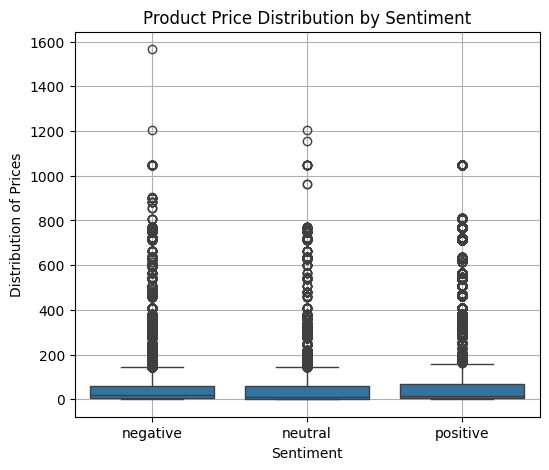

In [ ]:
print("Price summary by sentiment:\n")
print(df.groupby('sentiment',observed=False)['product_price'].describe())

plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='sentiment',y='product_price')
plt.title("Product Price Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Distribution of Prices")
plt.grid(True)
plt.show()

## 👩‍💻 Creating a new feature

We are now going to create a new feature called 'review_length', that represents the number of characters in each review.
Then we will visualize how review length varies across different sentiment categories.

In [ ]:
df['review_length']=df['review_text'].astype(str).str.len()
print("Review length summary:\n")
print(df['review_length'].describe())

Review length summary:

count    165960.000000
mean         48.378435
std          76.611087
min           1.000000
25%           9.000000
50%          19.000000
75%          50.000000
max         523.000000
Name: review_length, dtype: float64


In [ ]:
print("Review length statistics by sentiment:\n")
print(df.groupby('sentiment',observed=False)['review_length'].describe())

Review length statistics by sentiment:

              count       mean        std  min   25%   50%   75%    max
sentiment                                                              
negative    44663.0  60.900701  78.376363  1.0  16.0  32.0  71.0  523.0
neutral     13678.0  41.418190  64.707990  1.0   7.0  19.0  47.0  500.0
positive   107619.0  44.066187  76.679684  1.0   8.0  15.0  41.0  497.0


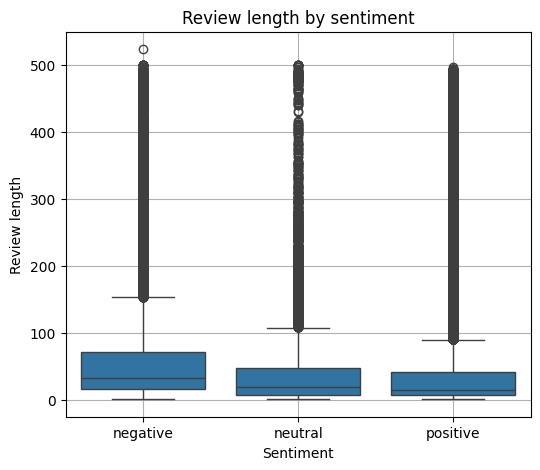

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='sentiment',y='review_length')
plt.title("Review length by sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review length")
plt.grid(True)
plt.show()

## 🔮 Training and Comapring Multiple Machine Models

In this lesson, we are going to train and evaluate several different machine learning models in order to find the best one for our classification task.

We will go through the following steps:

- Split the data into *training* and *test* sets
- Prepare the data by:
    - transforming the *review_text* and *review_title* columns using TF-IDF,
    - scaling the *review_length* column using MinMaxScaler,
    - use a ColumnTransformer to combine all features into one single input matrix
    - Define and train five different classification algorithms
    - Wrap all components into a unified Pipeline for each model
    - Evaluate model performance using classification reports.

By the end of this lesson you will be able to compare the strengths and weaknesses of different algorithms and select the most suitable one for your project.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
x=df[['review_title','review_text','review_length']]
y=df['sentiment']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


preprocessor=ColumnTransformer(transformers=[('title',TfidfVectorizer(),'review_title'),
                                             ('text',TfidfVectorizer(),'review_text'),
                                             ('length',MinMaxScaler(),['review_length'])])


models={"Logistic Regression": LogisticRegression(max_iter=1000),
        "Naive Bayes": MultinomialNB(),
        "SVC":LinearSVC(),
        "Random Forest":RandomForestClassifier(),
        "Decision Tree":DecisionTreeClassifier()}

for name, model in models.items():
  print(f"\n{name}")
  pipeline=Pipeline([('preprocessing',preprocessor),
                     ('classifier',model)])
  pipeline.fit(x_train,y_train)
  y_predict=pipeline.predict(x_test)
  print(classification_report(y_test,y_predict))


Logistic Regression
              precision    recall  f1-score   support

    negative       0.88      0.92      0.90      8932
     neutral       0.72      0.54      0.62      2736
    positive       0.96      0.97      0.97     21524

    accuracy                           0.92     33192
   macro avg       0.86      0.81      0.83     33192
weighted avg       0.92      0.92      0.92     33192


Naive Bayes
              precision    recall  f1-score   support

    negative       0.86      0.89      0.87      8932
     neutral       0.81      0.28      0.42      2736
    positive       0.92      0.98      0.95     21524

    accuracy                           0.90     33192
   macro avg       0.86      0.72      0.75     33192
weighted avg       0.89      0.90      0.88     33192


SVC
              precision    recall  f1-score   support

    negative       0.88      0.93      0.91      8932
     neutral       0.74      0.54      0.62      2736
    positive       0.96      0.97   